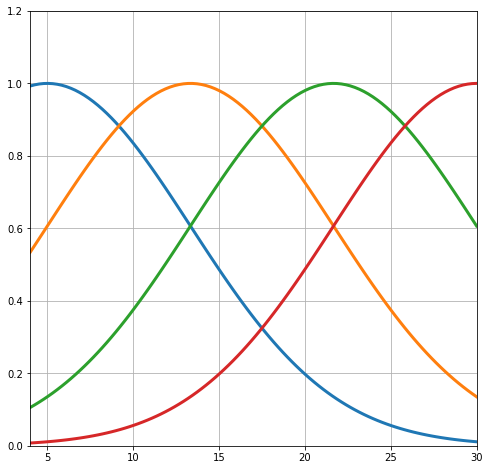

In [3]:
import numpy as np #수식 사용 라이브러리
import matplotlib.pyplot as plt #그림 그리기 라이브러리
%matplotlib inline #그래프 확인 명령줄

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
prm_c = [170, 108, 0.2]
T = prm_c[0] - prm_c[1]*np.exp(-prm_c[2]*X) + 4*np.random.randn(X_n) #T = 키, X = 나이
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

def gauss(x, mu, s): #가우스함수
    return np.exp(-(x-mu)**2/(2*s**2))

M=4 #파이0 ~ 파이4까지 4개의 가우스함수 발생
plt.figure(figsize=(8,8))
mu = np.linspace(5, 30, M) #5에서 30 사이에 4개의 mu 생성
s = mu[1] - mu[0] #s = 편차
xb = np.linspace(X_min, X_max, 100) #4부터 30까지 100개의 구간
for j in range(M): #for문이 돌 때 마다 함수를 만듦
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, linewidth=3)
    
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show() #파란색:파이0, 빨간색:파이3

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


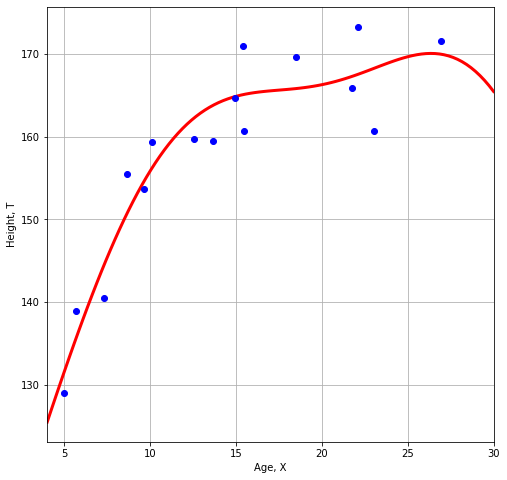

In [10]:
def gauss_func(w,x): #w와 x를 입력으로 받는 가우스 함수, w는 w0 ~ wM까지 선형기저모델 선형조합에 사용되는 매개변수
    m = len(w) - 1 # 4-1 = 3
    mu = np.linspace(5, 30, m) #평균값을 나타냄
    s = mu[1] - mu[0] #표준편차
    y = np.zeros_like(x) #x값에서의 함수값(가우스함수 계산)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s) #누적 + 가우스함수에 매개변수값 곱함
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w): #평균제곱오차 계산
    y = gauss_func(w,x) 
    mse = np.mean((y-t)**2) #t = 훈련데이터의 출력, 평균제곱오차 출력해주는 함수
    return mse
    
def fit_gauss_func(x, t, m): #가우스함수 피팅, 선형기저함수모델 코드(핵심코드),(xtm : 훈련데이터 입/출력, 기저함수 개수)
    mu = np.linspace(5, 30, m) #5~30까지 m개
    s = mu[1] - mu[0] #임의로 만든 표준편차
    n = x.shape[0] # Nx1 짜리 행렬 x의 shape은 [N, 1,훈련 데이터 개수를 나타냄
    psi = np.ones((n,m+1)) #전부 1로 채워져있는 행렬
    for j in range(m):
        psi[:,j] = gauss(x, mu[j], s) #파이
    psi_T = np.transpose(psi) #파이 트랜스포즈
    
    b = np.linalg.inv(psi_T.dot(psi)) #넘파이 안에 linalg(Linear Algebra, 선형대수학).inv, 역행렬연산, a.dot(b) = 행렬곱 계산
    c = b.dot(psi_T)
    w = c.dot(t) #최종 w
    return w
    
def show_gauss_func(w): #그림 그려주는 함수
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb) 
    plt.plot(xb, y ,'r-', linewidth=3)
    plt.xlabel('Age, X')
    plt.ylabel('Height, T')
    
plt.figure(figsize=(8,8))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W,1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show() #지난 주 7센티였던 오차(직선)가 3.98센티로 줄어들음(가우스함수 4개의 조합)

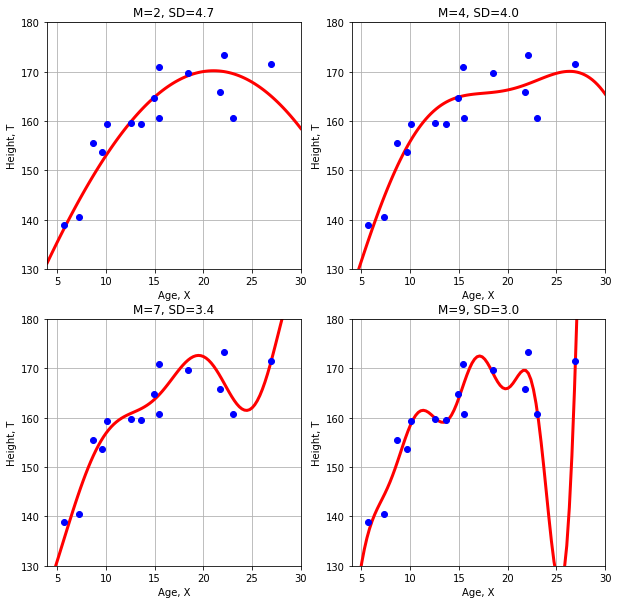

In [12]:
plt.figure(figsize=(10,10))
M = [2, 4, 7, 9]
for i in range(len(M)): #[0,1,2,3]
    plt.subplot(2, 2, i+1) #[1,2,3,4]번 창에 그래프를 그려라
    W = fit_gauss_func(X, T, M[i]) #최적 매개변수 w를 구하는 함수
    show_gauss_func(W) #그래프 그리는 함수
    plt.plot(X, T, 'bo')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show() #가우스함수를 더 많이 중첩할수록 더 복잡한 그래프가 나옴.
#M이 클수록 정확도로 사용했던 오차들의 평균편차 SD가 점점 좋아지지만, 좋은 모델이라고는 할 수 없음. 

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


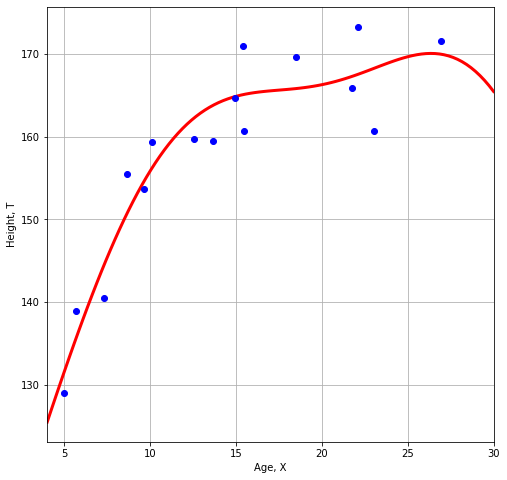

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed=1)
X_min = 4
X_max = 30
X_n = 16
X = 5 + 25*np.random.rand(X_n)
prm_c = [170, 108, 0.2]
T = prm_c[0] - prm_c[1]*np.exp(-prm_c[2]*X) + 4*np.random.randn(X_n)
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T)

def gauss(x, mu, s):
    return np.exp(-(x-mu)**2/(2*s**2))

def gauss_func(w,x): #w와 x를 입력으로 받는 가우스 함수, w는 w0 ~ wM까지 선형기저모델 선형조합에 사용되는 매개변수
    m = len(w) - 1 # 4-1 = 3
    mu = np.linspace(5, 30, m) #평균값을 나타냄
    s = mu[1] - mu[0] #표준편차
    y = np.zeros_like(x) #x값에서의 함수값(가우스함수 계산)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s) #누적 + 가우스함수에 매개변수값 곱함
    y = y + w[m]
    return y

def mse_gauss_func(x, t, w): #평균제곱오차 계산
    y = gauss_func(w,x) 
    mse = np.mean((y-t)**2) #t = 훈련데이터의 출력, 평균제곱오차 출력해주는 함수
    return mse
    
def fit_gauss_func(x, t, m): #가우스함수 피팅, 선형기저함수모델 코드(핵심코드),(xtm : 훈련데이터 입/출력, 기저함수 개수)
    mu = np.linspace(5, 30, m) #5~30까지 m개
    s = mu[1] - mu[0] #임의로 만든 표준편차
    n = x.shape[0] # Nx1 짜리 행렬 x의 shape은 [N, 1,훈련 데이터 개수를 나타냄
    psi = np.ones((n,m+1)) #전부 1로 채워져있는 행렬
    for j in range(m):
        psi[:,j] = gauss(x, mu[j], s) #파이
    psi_T = np.transpose(psi) #파이 트랜스포즈
    
    b = np.linalg.inv(psi_T.dot(psi)) #넘파이 안에 linalg(Linear Algebra, 선형대수학).inv, 역행렬연산, a.dot(b) = 행렬곱 계산
    c = b.dot(psi_T)
    w = c.dot(t) #최종 w
    return w
    
def show_gauss_func(w): #그림 그려주는 함수
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb) 
    plt.plot(xb, y ,'r-', linewidth=3)
    plt.xlabel('Age, X')
    plt.ylabel('Height, T')
    
plt.figure(figsize=(8,8))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W,1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show() #지난 주 7센티였던 오차(직선)가 3.98센티로 줄어들음(가우스함수 4개의 조합)

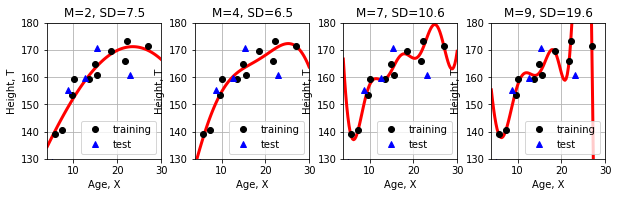

In [9]:
X_test = X[:int(X_n/4+1)] #데이터 세트 분리 과정
T_test = T[:int(X_n/4+1)] #X_n/4 는 4.00 
X_train = X[int(X_n/4+1):] #X_n/4 +1은 5.00
T_train = T[int(X_n/4+1):] #int는 데이터 형을 정수로 변환하는 함수, 5가 됨(=c언어 cast연산)
                            #X[:5]는 처음부터 4번까지 데이터를 일괄적으로 호출함.
plt.figure(figsize=(10,2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9] #선형기저함수모델에서 몇 개의 기저함수를 사용할지 나타냄.
for i in range(len(M)):
    plt.subplot(1, len(M), i+1)#1행 4열
    W = fit_gauss_func(X_train, T_train, M[i])#선형기저함수모델의 해석해
    show_gauss_func(W)
    plt.plot(X_train, T_train, 'ko', label='training')
    plt.plot(X_test, T_test, 'b^', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse=mse_gauss_func(X_test, T_test, W)#테스트 데이터에 대해서 오차를 측정함
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
    
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

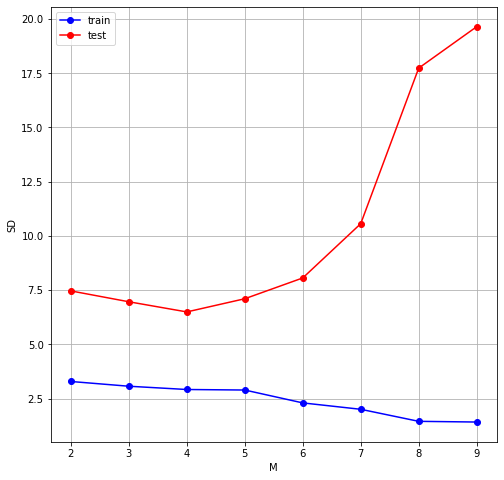

In [11]:
plt.figure(figsize=(8,8))
M = range(2,10) #[2,3,4,5,6,7,8,9]
mse_train = np.zeros(len(M)) #0 8개 초기화
mse_test = np.zeros(len(M))
for i in range(len(M)): #0에서 7까지
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, 'b-o', label='train')
plt.plot(M, mse_test, 'r-o', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.xlabel('M')
plt.ylabel('SD')
#plt.ylim(0,12)
plt.grid(True)
plt.show #홀드아웃 검증을 사용하면 M이 4일 때 훈련데이터, 테스트데이터가 최적임

In [25]:
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0] #행의 값, 입력데이터의 개수
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    
    for i in range(0, k): #i는 0부터 k-1까지
        x_train = x[np.fmod(range(n),k) !=i] #numpy.fmod(a,b)는 나머지 연산자. a%b와 같음.
        t_train = t[np.fmod(range(n), k) !=i] #0에서 15까지 [0123] 4묶음으로 반복되는 벡터, i가 같지 않다면 train으로 들어감
        x_test = x[np.fmod(range(n), k) == i] #i가 같으면 test로 들어감
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

<function matplotlib.pyplot.show(*args, **kw)>

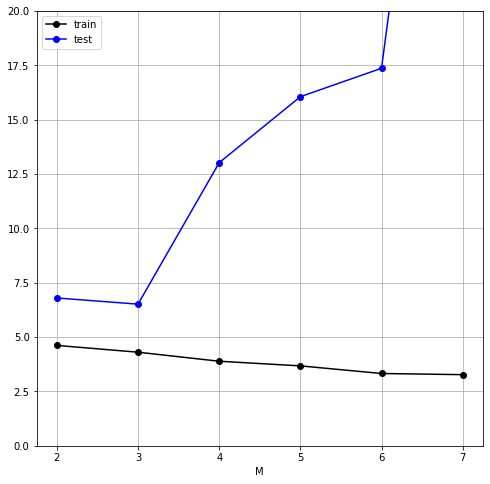

In [27]:
M = range(2,8) #M은 2에서 7까지 변화함. #목적 : 몇 개의 가우스 함수를 중첩해야 가장 좋은 성능이 나올까?
K = 16 #교차검증을 위한 그룹(데이터)의 개수, LOOCV
Cv_Gauss_train = np.zeros((K, len(M))) #교차검증 값이 들어갈 벡터 0으로 초기화, 행이 16개, 열이 6개
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)): #0부터 5까지
    Cv_Gauss_train[:,i], Cv_Gauss_test[:,i] = kfold_gauss_func(X, T, M[i], 16) #트레이닝, 테스트 데이터에 대한 에러
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(8,8))
plt.plot(M, mean_Gauss_train, 'k-o', label='train')
plt.plot(M, mean_Gauss_test, 'b-o', label='test')
plt.legend(loc='upper left')
plt.ylim(0,20)
plt.grid(True)
plt.xlabel('M')
plt.show #최적M은 3

W=[ 344.8   -6.3  366.2 -259. ]
SD=4.37 cm


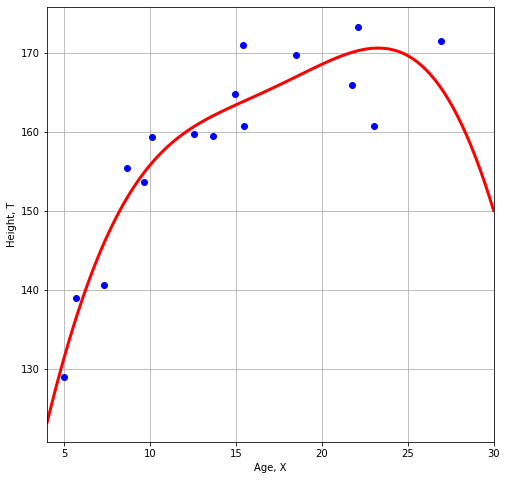

In [29]:
M = 3
plt.figure(figsize=(8,8))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W,1)))
print('SD={0:.2f} cm'.format(np.sqrt(mse)))
plt.show()

In [31]:
def model_A(x,w): #w = [w0, w1, w1]
    y = w[0] - w[1]*np.exp(-w[2]*x)
    return y

def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y)
    
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y-t)**2)
    return mse

from scipy.optimize import minimize

def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell") #최솟값을 구하기 위한 함수 A(이름만, 입력은 w,x,t), 초기값,
    return res1.x                                                      #구하고자 하는 변수를 제외한 입력들(w 구해야하므로 args=(x, t))

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


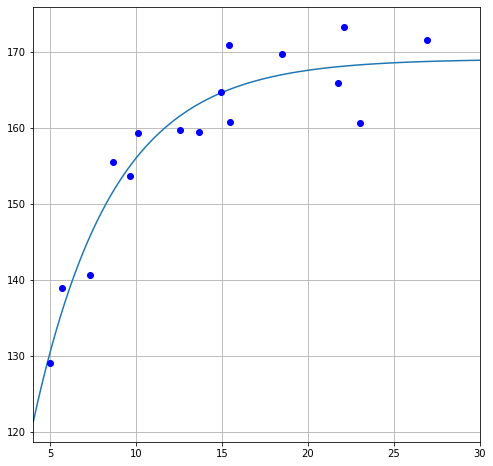

In [34]:
plt.figure(figsize=(8,8))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, 'bo')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


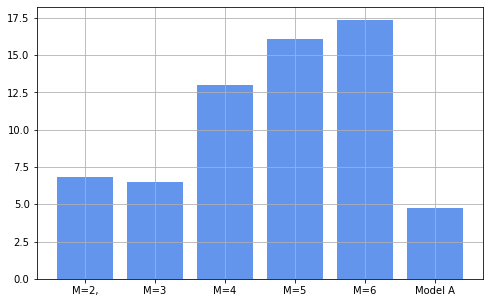

In [36]:
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k): 
        x_train = x[np.fmod(range(n),k) !=i] 
        t_train = t[np.fmod(range(n), k) !=i] 
        x_test = x[np.fmod(range(n), k) == i] 
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

K=16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2,", "M=3", "M=4", "M=5", "M=6", "Model A"]

plt.figure(figsize=(8,5))
plt.bar(M, SD, tick_label=label, align="center", facecolor="cornflowerblue") #bar chart
plt.grid(True)
plt.show()